# Random Variates

When we perform a fit or load and analysis result, the parmeters of our model become distributions in the AnalysisResults object. These are actaully instantiactions of the RandomVaraiates class. 

While we have covered most of the functionality of RandomVariates in the AnalysisResults section, we want to highlight a few of the details here.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

from threeML import *



Configuration read from /Users/jburgess/.threeML/threeML_config.yml


Let's load back our fit of the line + gaussian from the AnalysisResults section.

In [2]:
ar = load_analysis_results('test_mle.fits')

When we display our fit, we can see the **parameter paths** of the model. What if we want specific information on a parameter(s)?

In [3]:
ar.display()

Best fit values:



,result,unit
parameter,,
fake.spectrum.main.composite.a_1,(-4.000 +/- 4) x 10^-3,1 / (cm2 keV2 s)
fake.spectrum.main.composite.b_1,2.060 +/- 0.11,1 / (cm2 keV s)
fake.spectrum.main.composite.F_2,(2.900 +/- 0.4) x 10,1 / (cm2 s)
fake.spectrum.main.composite.mu_2,(2.483 +/- 0.013) x 10,keV
fake.spectrum.main.composite.sigma_2,1.140 +/- 0.10,keV



Correlation matrix:



1.00,-0.85,-0.00,-0.03,0.00
-0.85,1.00,-0.05,0.01,-0.09
-0.00,-0.05,1.00,0.17,-0.20
-0.03,0.01,0.17,1.00,0.18
0.00,-0.09,-0.20,0.18,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
sim_data,26.967829
total,26.967829



Values of statistical measures:



,statistical measures
AIC,65.299295
BIC,73.495774


Let's take a look at the normalization of the gaussian. To access the parameter, we take the parameter path, and we want to get the variates:

In [5]:
norm = ar.get_variates('fake.spectrum.main.composite.F_2')

Now, norm is a RandomVariate.

In [6]:
type(norm)

threeML.random_variates.RandomVariates

This is essentially a wrapper around numpy NDArray with a few added properties. It is an array of samples. In the MLE case, they are samples from the covariance matrix (this is not at all a marginal distribution, but the parameter "knows" about the entire fit, i.e., it is *not* a profile) and in the Bayesian case, these are samples from the posterior (this is a marginal).

The output representation for an RV are its 68% equal-tail and HPD uncertainties.

In [8]:
norm

equal-tail: (2.900 +/- 0.4) x 10, hpd: (2.900 +/- 0.4) x 10

We can access these directly, and to any desired confidence level.

In [10]:
norm.equal_tail_interval(cl=0.95)

(21.638312504143475, 36.60389748500898)

In [11]:
norm.highest_posterior_density_interval(cl=0.5)

(26.415474143654809, 31.64394893492064)

These functions return the upper and lower bounds of the confidence (credible) regions. They will not always be symmetric. 

NDArray, we can access other statistical properties as well:

In [12]:
print( norm.mean() )
print( norm.median )


29.0807618877
29.1093882509


As stated above, the RV is made from samples. We can histogram them to show this explicitly.

<IPython.core.display.Javascript object>


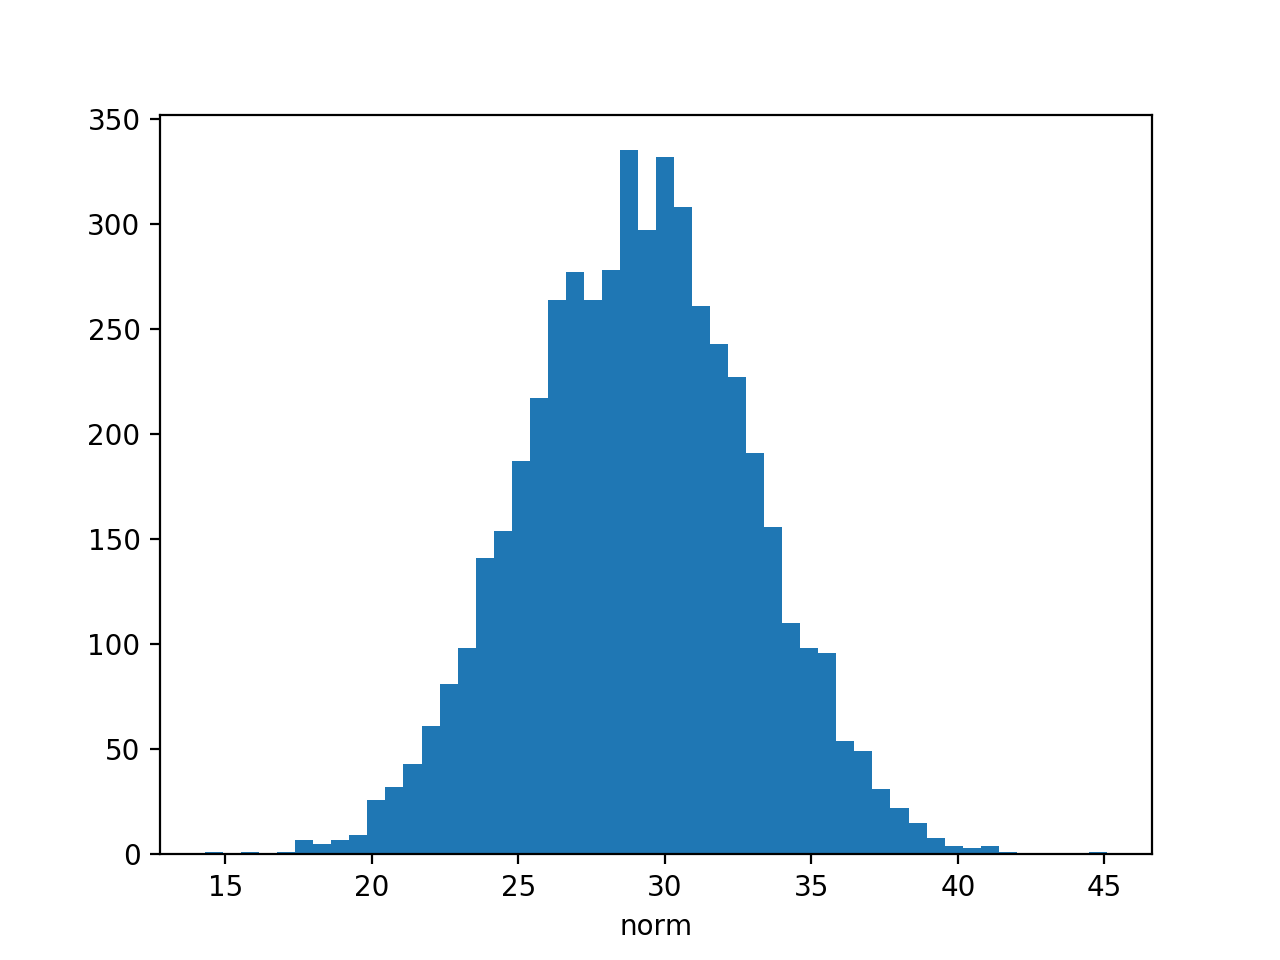

In [20]:
fig, ax = plt.subplots()

ax.hist(norm.samples,bins=50);
ax.set_xlabel('norm');

We can easily transform the RV through propagation.

In [17]:
log_norm = np.log10(norm)
log_norm

equal-tail: 1.46 -0.06 +0.05, hpd: 1.460 +/- 0.06

<IPython.core.display.Javascript object>


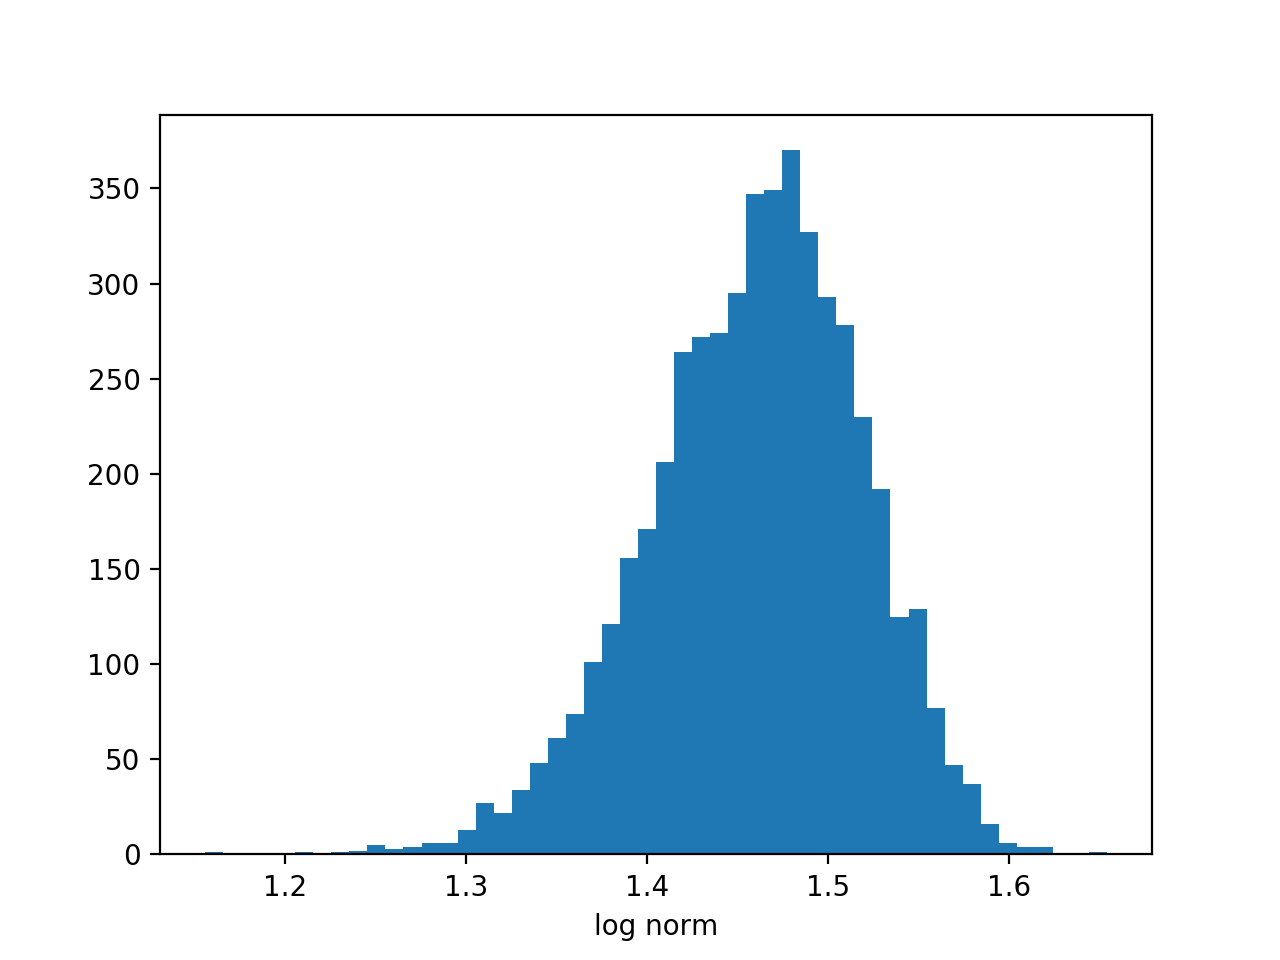

In [19]:
fig, ax = plt.subplots()

ax.hist(log_norm.samples,bins=50);
ax.set_xlabel('log norm');

NOTE: Some operations will destroy the RV by accessing only its NDArray substructure. For example, using an RV with astropy units will return an array of samples with the given units. 